# 따릉이 데이터 전처리

In [91]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import plotly.express as px

### 데이터 불러오기

In [92]:
data = pd.read_csv("train.csv")

1. Rented Bike Count:
대여된 자전거의 수를 나타냅니다. 이 값은 해당 날짜와 시간에 사람들이 대여한 자전거의 총 개수입니다. 자전거 대여 수는 기상 조건이나 특정 날짜에 영향을 받을 수 있습니다.
2. Hour:
자전거 대여가 발생한 시간(0부터 23까지의 값)을 나타냅니다. 특정 시간대에 자전거 대여 수가 더 많을 수 있으며, 이는 피크 시간(출퇴근 시간 등)에 해당할 수 있습니다.
3. Temperature (°C):
기온을 나타내며, 섭씨(°C) 단위로 측정됩니다. 기온은 자전거 대여 수에 큰 영향을 미칠 수 있습니다. 따뜻한 날씨에는 사람들이 자전거를 더 많이 대여할 수 있습니다.
4. Humidity (%):
습도를 백분율(%)로 나타냅니다. 높은 습도는 자전거 타기에 불편함을 줄 수 있기 때문에, 대여 수에 영향을 미칠 수 있습니다.
5. Wind speed (m/s):
바람 속도를 미터/초(m/s)로 나타냅니다. 바람이 강한 날에는 자전거 대여 수가 줄어들 수 있습니다. 특히 바람이 강한 날에는 야외 활동을 기피할 수 있습니다.
6. Visibility (10m):
가시거리를 10미터 단위로 측정한 값입니다. 가시거리가 낮으면, 자전거 타기 위험도가 높아져 대여 수가 줄어들 수 있습니다.
7. Dew point temperature (°C):
이슬점 온도를 나타냅니다. 이슬점은 공기 중 수분이 응결되어 물방울이 될 수 있는 온도입니다. 이 값은 기온과 습도를 고려하여 환경을 평가하는 데 사용됩니다.
8. Solar Radiation (MJ/m²):
태양 복사 에너지를 나타내는 값으로, 단위는 메가줄(MJ/m²)입니다. 이 값은 태양의 강도를 나타내며, 햇빛이 강한 날은 사람들이 자전거를 더 자주 대여할 수 있습니다.
9. Rainfall (mm):
강수량을 밀리미터(mm) 단위로 나타냅니다. 비가 많이 오면 자전거 대여 수는 감소할 가능성이 큽니다.
10. Snowfall (cm):
눈이 내린 양을 센티미터(cm)로 측정합니다. 눈이 많이 내리면 자전거 대여는 거의 없거나 매우 적을 수 있습니다.
11. Seasons:
계절을 나타냅니다. 보통 'Spring', 'Summer', 'Fall', 'Winter'와 같은 값으로 분류됩니다. 계절에 따라 자전거 대여 수는 달라질 수 있습니다.
12. Holiday:
해당 날짜가 공휴일인지 여부를 나타냅니다. 1은 공휴일을 의미하고, 0은 공휴일이 아님을 나타냅니다. 공휴일에는 사람들이 여가 활동을 위해 자전거를 더 많이 대여할 수 있습니다.
13. Functioning Day:
자전거 대여 서비스가 정상 운영되었는지 여부를 나타냅니다. 1은 운영, 0은 비운영을 의미합니다. 비가 많이 오거나, 시스템에 문제가 있으면 자전거 대여 서비스가 일시 중지될 수 있습니다.

In [93]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [94]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8035,31/10/2018,1507,19,8.4,53,NaN,2000,-0.6,0.0,0.0,0.0,Autumn,No Holiday,Yes
8036,31/10/2018,1176,20,7.6,59,0.7,2000,0.0,0.0,0.0,0.0,NaN,No Holiday,Yes
8037,31/10/2018,1069,21,7.6,59,3.0,1929,0.0,0.0,0.0,0.0,Autumn,No Holiday,Yes
8038,31/10/2018,1088,22,6.8,58,2.2,1936,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8039,31/10/2018,798,23,6.4,60,1.8,1930,-0.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [95]:
data.shape

(8040, 14)

In [96]:
data.isnull().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
dtype: int64

In [97]:
data.describe()

,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8040.000000,8040.000000,7240.000000,8040.000000,7238.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000
mean,709.775995,11.500000,13.498564,58.271020,1.756756,1459.170896,4.522239,0.587072,0.152164,0.066493
std,657.320605,6.922617,12.270471,20.340492,1.045901,603.716284,13.393517,0.886186,1.127026,0.378182
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,43.000000,1.000000,977.000000,-4.600000,0.000000,0.000000,0.000000
50%,485.000000,11.500000,15.600000,57.000000,1.600000,1741.000000,6.400000,0.020000,0.000000,0.000000
75%,1080.500000,17.250000,23.300000,74.000000,2.400000,2000.000000,15.600000,0.960000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


In [98]:
df = data.copy()
df['Temperature(째C)'] = df['Temperature(째C)'].fillna(df['Temperature(째C)'].mean())

In [99]:
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].mean())

<Axes: xlabel='Seasons', ylabel='count'>

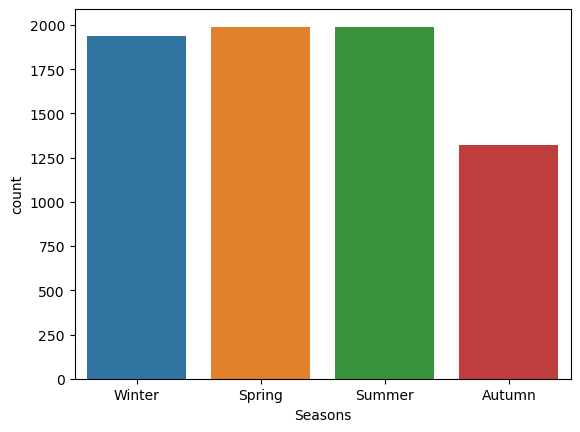

In [100]:
sns.countplot(x=df['Seasons'],data=df)

<Axes: xlabel='Holiday', ylabel='count'>

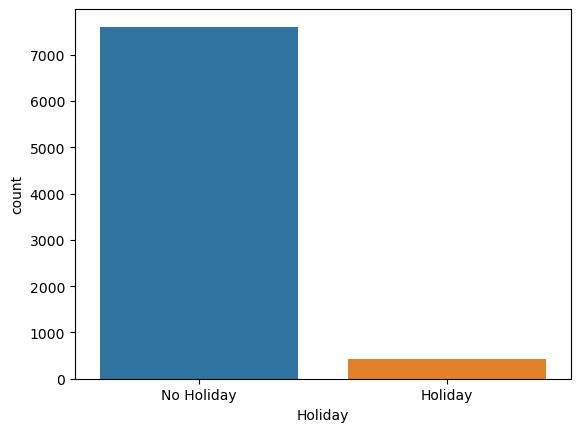

In [101]:
sns.countplot(x=df['Holiday'],data=df)

<Axes: xlabel='Functioning Day', ylabel='count'>

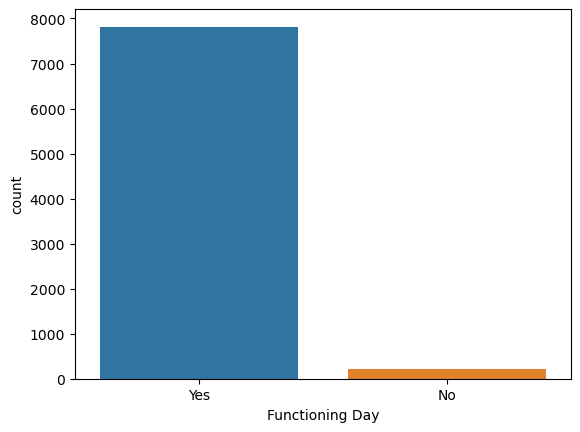

In [102]:
sns.countplot(x=df['Functioning Day'],data=df)

In [103]:
df['Seasons'] = df['Seasons'].map({'Spring': 0, 'Summer': 1, 'Autumn': 2, 'Winter': 3})

df['Holiday'] = df['Holiday'].map({'No Holiday': 1, 'Holiday': 0})

df['Functioning Day'] = df['Functioning Day'].map({'Yes': 1, 'No': 0})

In [104]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.200000,2000,-17.6,0.0,0.0,0.0,NaN,1,1
1,01/12/2017,204,1,-5.5,38,0.800000,2000,-17.6,0.0,0.0,0.0,3.0,1,1
2,01/12/2017,173,2,-6.0,39,1.000000,2000,-17.7,0.0,0.0,0.0,3.0,1,1
3,01/12/2017,107,3,-6.2,40,0.900000,2000,-17.6,0.0,0.0,0.0,3.0,1,1
4,01/12/2017,78,4,-6.0,36,1.756756,2000,-18.6,0.0,0.0,0.0,3.0,1,1


In [105]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

def get_season(month):
    if month in [3, 4, 5]:
        return 0
    elif month in [6, 7, 8]:
        return 1
    elif month in [9, 10, 11]:
        return 2
    else:
        return 3

df['Seasons'] = df['Seasons'].fillna(df['Date'].dt.month.apply(get_season))

In [106]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [107]:
df = df.drop(columns= ['Date'])

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X = df.drop(columns=['Rented Bike Count'])
Y = df['Rented Bike Count']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
## 선형회귀모델 정의 및 학습
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [112]:
# 평가
from sklearn.metrics import r2_score, mean_squared_error

In [113]:
# 평가하는 함수를 만들면, 추후 다른 모델에도 바로 적용 가능!
def eval_regression(model):
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    print('학습 능력')
    print('R Square : ', r2_score(Y_train, Y_train_pred))
    print('MSE : ', mean_squared_error(Y_train, Y_train_pred))
    print('일반화 능력')
    print('R Square : ', r2_score(Y_test, Y_test_pred))
    print('MSE : ', mean_squared_error(Y_test, Y_test_pred))

In [114]:
## model 평가
eval_regression(model)

학습 능력
R Square :  0.5297905048224012
MSE :  202346.03711515228
일반화 능력
R Square :  0.5423811622586556
MSE :  200755.98633573024


In [115]:
from sklearn.preprocessing import PolynomialFeatures
# 기존의 X값을 다항식으로 변환

In [116]:
## 다항회귀분석 실행
X_poly = PolynomialFeatures(degree=2).fit_transform(X_train)
pd.DataFrame(X_poly)

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,1.0,9.0,0.800000,47.0,0.9,1070.0,-9.2,0.05,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,3.0,3.0,1.0,1.0,1.0
1,1.0,10.0,-7.700000,43.0,0.9,1555.0,-18.1,0.35,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,3.0,3.0,1.0,1.0,1.0
2,1.0,3.0,20.000000,58.0,1.8,1279.0,11.4,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,1.0,11.0,27.500000,31.0,1.9,1841.0,8.8,2.70,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,23.400000,47.0,2.1,2000.0,11.4,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6427,1.0,18.0,13.498564,52.0,2.1,2000.0,15.2,0.57,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
6428,1.0,14.0,29.500000,62.0,2.7,1941.0,21.4,1.79,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
6429,1.0,20.0,-3.400000,51.0,1.1,1391.0,-12.1,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,3.0,3.0,1.0,1.0,1.0
6430,1.0,19.0,14.800000,47.0,1.3,1111.0,3.5,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,2.0,2.0,1.0,1.0,1.0


In [117]:
# 파이프 라인을 활용하여 다항 회귀 분석 수행
from sklearn.pipeline import make_pipeline
model_linear = make_pipeline(PolynomialFeatures(degree=2),LinearRegression()) # 모델 정의 (다항회귀분석 + 선형회귀분석)
model_linear.fit(X_train,Y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [118]:
# 다항회귀모델 평가
eval_regression(model_linear)

학습 능력
R Square :  0.6847283841349276
MSE :  135671.36082841735
일반화 능력
R Square :  0.6976461033449364
MSE :  132641.73093273595


In [119]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [120]:
## 파이프라인으로 규제선형회귀 분석
model_pipe1 = make_pipeline(StandardScaler(),Lasso()) # 표준화 + Lasso 회귀 적용
## 스케일링 : Lasso 회귀처럼 규제를 사용하는 모델에서 중요 _ 특성들의 스케일이 다르면 규제가 잘못적용될 수 있기 때문에
model_pipe1

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [121]:
hyperparam = {'lasso__alpha' : (0.5, 1, 1.5)} # 클수록 강도가 강해짐
grid_model = GridSearchCV(model_pipe1, param_grid = hyperparam, cv=3, 
                          scoring='r2', n_jobs=-1)
grid_model.fit(X_train, Y_train)
best_model = grid_model.best_estimator_
best_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=1))])

In [122]:
# 모델 평가
eval_regression(best_model)

학습 능력
R Square :  0.5297377680989519
MSE :  202368.7313974027
일반화 능력
R Square :  0.5419230084229045
MSE :  200956.97702405864


In [123]:
df_coef = pd.DataFrame()
df_coef['Coef'] = best_model['lasso'].coef_
df_coef['X'] = X.columns

In [124]:
px.bar(df_coef, x='X', y='Coef')

In [125]:
from sklearn.linear_model import Ridge

In [126]:
## 파이프라인으로 규제선형회귀 분석 - L2규제
model_pipe2 = make_pipeline(StandardScaler(),Ridge()) # 스케일링 + L2규제
model_pipe2

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [127]:
hyperparam = {'ridge__alpha' : (0.1, 1, 1.5)}
grid_model = GridSearchCV(model_pipe2, param_grid = hyperparam, cv=3, 
                          scoring='r2', n_jobs=-1)
grid_model.fit(X_train, Y_train)
best_model2 = grid_model.best_estimator_
best_model2

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=1.5))])

In [128]:
# 모델 평가
eval_regression(best_model2)

학습 능력
R Square :  0.5297900859378472
MSE :  202346.21737444174
일반화 능력
R Square :  0.5423559884856168
MSE :  200767.02999306985


In [129]:
df_coef = pd.DataFrame()
df_coef['Coef'] = best_model2['ridge'].coef_
df_coef['X'] = X.columns

In [130]:
px.bar(df_coef, x='X', y='Coef')

In [131]:
from sklearn.linear_model import ElasticNet

In [132]:
## 파이프라인으로 규제선형회귀 분석 - Elastic net
model_pipe3 = make_pipeline(StandardScaler(),ElasticNet())
model_pipe3

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet())])

In [133]:
hyperparam = {'elasticnet__alpha' : (0.1, 1, 1.5)}
grid_model = GridSearchCV(model_pipe3, param_grid = hyperparam, cv=3, 
                          scoring='r2', n_jobs=-1)
grid_model.fit(X_train, Y_train)
best_model3 = grid_model.best_estimator_
best_model3

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(alpha=0.1))])

In [134]:
# 모델 평가
eval_regression(best_model3)

학습 능력
R Square :  0.5247198256335455
MSE :  204528.1109564295
일반화 능력
R Square :  0.5347181415911818
MSE :  204117.73009611125


In [135]:
df_coef = pd.DataFrame()
df_coef['Coef'] = best_model3['elasticnet'].coef_
df_coef['X'] = X.columns

In [136]:
px.bar(df_coef, x='X', y='Coef')

In [137]:
from sklearn.ensemble import RandomForestRegressor

In [138]:
model_pipe3 = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
model_pipe3

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [139]:
hyperparam = {
    "randomforestregressor__n_estimators": [50, 100, 200],
    "randomforestregressor__max_depth": [None, 5, 10],
    "randomforestregressor__min_samples_split": [2, 5, 10]
}

In [140]:
grid_model = GridSearchCV(model_pipe3, param_grid=hyperparam, cv=3, scoring='r2', n_jobs=-1)

grid_model.fit(X_train, Y_train)
best_model3 = grid_model.best_estimator_
best_model3

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [141]:
print("최적 파라미터", grid_model.best_params_)
# 모델 평가
eval_regression(best_model3)

최적 파라미터 {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 200}
학습 능력
R Square :  0.9819721678457495
MSE :  7757.94710996191
일반화 능력
R Square :  0.8765967323530169
MSE :  54136.636585587694


In [142]:
data2 = pd.read_csv("test.csv")

In [143]:
df = data2.copy()
df['Temperature(째C)'] = df['Temperature(째C)'].fillna(df['Temperature(째C)'].mean())
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].mean())

df['Seasons'] = df['Seasons'].map({'Spring': 0, 'Summer': 1, 'Autumn': 2, 'Winter': 3})

df['Holiday'] = df['Holiday'].map({'No Holiday': 1, 'Holiday': 0})

df['Functioning Day'] = df['Functioning Day'].map({'Yes': 1, 'No': 0})

df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

def get_season(month):
    if month in [3, 4, 5]:
        return 0
    elif month in [6, 7, 8]:
        return 1
    elif month in [9, 10, 11]:
        return 2
    else:
        return 3

df['Seasons'] = df['Seasons'].fillna(df['Date'].dt.month.apply(get_season))

In [144]:
df = df.drop(columns= ['Date'])

In [151]:
colums = [
    'Hour',
    'Temperature(째C)',
    'Humidity(%)',
    'Wind speed (m/s)',
    'Visibility (10m)',
    'Dew point temperature(째C)',
    'Solar Radiation (MJ/m2)',
    'Rainfall(mm)',
    'Snowfall (cm)',
    'Seasons',
    'Holiday',
    'Functioning Day'
]

In [ ]:
model = RandomForestRegressor(
    random_state=42, 
    max_depth=None, 
    min_samples_split=2, 
    n_estimators=200
)

model.fit(X_train, Y_train)

df['Rented Bike Count'] = model.predict(df[colums])

In [153]:
df.head(20)

,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,0,5.7,62,2.300000,1909,-1.0,0.00,0.0,0.0,2.0,1,1,439.445
1,1,5.1,65,1.600000,1932,-0.9,0.00,0.0,0.0,2.0,1,1,395.060
2,2,4.4,64,1.396285,2000,-1.8,0.00,0.0,0.0,2.0,1,1,261.870
3,3,4.2,65,0.700000,1962,-1.8,0.00,0.0,0.0,2.0,1,1,175.935
4,4,3.6,70,0.800000,1934,-1.3,0.00,0.0,0.0,2.0,1,1,144.405
5,5,3.3,72,0.000000,1946,-1.2,0.00,0.0,0.0,2.0,1,1,168.790
6,6,2.9,75,0.200000,1761,-1.1,0.00,0.0,0.0,2.0,1,1,347.455
7,7,2.5,75,0.500000,1763,-1.4,0.00,0.0,0.0,2.0,1,1,983.895
8,8,2.8,74,0.900000,1366,-1.3,0.13,0.0,0.0,2.0,1,1,1256.895
9,9,4.7,60,0.900000,1219,-2.4,0.82,0.0,0.0,2.0,1,1,928.150
